# Project Overview

Develop a model to analyze legacy subscriber behavior from the mobile carrier Megaline to recommend one of Megaline's new plans (Smart or Ultra).

Using behavior data about subscribers who have switched to a new plan, develop a model that will pick the right plan for users on a legacy plan. The model requires high accuracy with a threshold of 0.75.

# Environment Setup and Required Libraries

**Plan of Action:**
- Load the dataset
- Split the source data into 3 sets (training, validation, and test)
- Investigate the quality of different models
- Check the quality of the models through hyperparameters
- Check the model for errors

**What is the target?**

Finding the right plan for legacy users based on user behavior of current new plan users.
- target = is_ultra

**What is the feature?**

The features are all of the other columns


In [1]:
#Required Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import set_config


# Imports for a Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


# Imports for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


# Imports for Logistic Regression
from sklearn.linear_model import LogisticRegression


# Imports for Linear Regression
from sklearn.linear_model import LinearRegression


# Step 1: Loading and Initial Data Exploration

In [2]:
# Load the dataset
user_behavior = pd.read_csv("/datasets/users_behavior.csv")
display(user_behavior)


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
# Display information
user_behavior.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Data Information:**
- 3,214 rows
- 5 columns
- No missing data
- All data types correctly labeled

# Step 2: Split the Data

Since a test set does not exist, the standard practice is to separate the datasets in a 3:1:1 ratio or 60:20:20. The validation and test sets are usually equal.

In [4]:
# Split the source data into a training set, a validation set, and a test set

# First, split the training set at 60%
df_train, df_temp = train_test_split(user_behavior,test_size=0.4,random_state=12345)

# Second, split the validation set and the testing set at 20%
df_valid, df_test = train_test_split(df_temp,test_size=0.5,random_state = 12345)

In [5]:
# Observe the training set
display(df_train)

df_train.info()

,calls,minutes,messages,mb_used,is_ultra
3027,60.0,431.56,26.0,14751.26,0
434,33.0,265.17,59.0,17398.02,0
1226,52.0,341.83,68.0,15462.38,0
1054,42.0,226.18,21.0,13243.48,0
1842,30.0,198.42,0.0,8189.53,0
...,...,...,...,...,...
2817,12.0,86.62,22.0,36628.85,1
546,65.0,458.46,0.0,15214.25,1
382,144.0,906.18,0.0,25002.44,1
2177,38.0,301.27,37.0,28914.24,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 3027 to 482
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
 4   is_ultra  1928 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.4 KB


In [6]:
# Observe the Validation Set
display(df_valid)

df_valid.info()

,calls,minutes,messages,mb_used,is_ultra
1386,92.0,536.96,18.0,20193.90,0
3124,40.0,286.57,17.0,17918.75,0
1956,81.0,531.22,56.0,17755.06,0
2286,67.0,460.76,27.0,16626.26,0
3077,22.0,120.09,16.0,9039.57,0
...,...,...,...,...,...
1999,56.0,398.45,4.0,23682.94,0
1023,76.0,601.10,0.0,17104.36,0
748,81.0,525.97,15.0,18878.91,0
1667,10.0,63.03,0.0,2568.00,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1386 to 3197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


In [7]:
# Observe the testing set
display(df_test)

df_test.info()


,calls,minutes,messages,mb_used,is_ultra
160,61.0,495.11,8.0,10891.23,0
2498,80.0,555.04,28.0,28083.58,0
1748,87.0,697.23,0.0,8335.70,0
1816,41.0,275.80,9.0,10032.39,0
1077,60.0,428.49,20.0,29389.52,1
...,...,...,...,...,...
2401,55.0,446.06,79.0,26526.28,0
2928,102.0,742.65,58.0,16089.24,1
1985,52.0,349.94,42.0,12150.72,0
357,39.0,221.18,59.0,17865.23,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 160 to 2313
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
 4   is_ultra  643 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


# Step 3: Investigate the Quality of Varying Models Through Hyperparameters

In [8]:
# Investigate the quality of different models by testing hyperparameters. 

# First, put the training features and target features into it's own variable

features_train = df_train.drop(['is_ultra'],axis=1)
display(features_train)

target_train = df_train['is_ultra']
display(target_train)



,calls,minutes,messages,mb_used
3027,60.0,431.56,26.0,14751.26
434,33.0,265.17,59.0,17398.02
1226,52.0,341.83,68.0,15462.38
1054,42.0,226.18,21.0,13243.48
1842,30.0,198.42,0.0,8189.53
...,...,...,...,...
2817,12.0,86.62,22.0,36628.85
546,65.0,458.46,0.0,15214.25
382,144.0,906.18,0.0,25002.44
2177,38.0,301.27,37.0,28914.24


3027    0
434     0
1226    0
1054    0
1842    0
       ..
2817    1
546     1
382     1
2177    1
482     1
Name: is_ultra, Length: 1928, dtype: int64

In [9]:
# Second, put the validation features and target features into it's own variable

features_valid = df_valid.drop(['is_ultra'],axis=1)
display(features_valid)

target_valid = df_valid['is_ultra']
display(target_valid)


,calls,minutes,messages,mb_used
1386,92.0,536.96,18.0,20193.90
3124,40.0,286.57,17.0,17918.75
1956,81.0,531.22,56.0,17755.06
2286,67.0,460.76,27.0,16626.26
3077,22.0,120.09,16.0,9039.57
...,...,...,...,...
1999,56.0,398.45,4.0,23682.94
1023,76.0,601.10,0.0,17104.36
748,81.0,525.97,15.0,18878.91
1667,10.0,63.03,0.0,2568.00


1386    0
3124    0
1956    0
2286    0
3077    0
       ..
1999    0
1023    0
748     0
1667    1
3197    0
Name: is_ultra, Length: 643, dtype: int64

In [10]:
# Third, put the testing features and target features into it's own variable

features_test = df_test.drop(['is_ultra'],axis=1)
display(features_test)

target_test = df_test['is_ultra']
display(target_test)


,calls,minutes,messages,mb_used
160,61.0,495.11,8.0,10891.23
2498,80.0,555.04,28.0,28083.58
1748,87.0,697.23,0.0,8335.70
1816,41.0,275.80,9.0,10032.39
1077,60.0,428.49,20.0,29389.52
...,...,...,...,...
2401,55.0,446.06,79.0,26526.28
2928,102.0,742.65,58.0,16089.24
1985,52.0,349.94,42.0,12150.72
357,39.0,221.18,59.0,17865.23


160     0
2498    0
1748    0
1816    0
1077    1
       ..
2401    0
2928    1
1985    0
357     0
2313    0
Name: is_ultra, Length: 643, dtype: int64

In [11]:
# Test the accuracy_score for the DecisionTree model

for depth in range(1,21):
    model = DecisionTreeClassifier(random_state = 12345, max_depth= depth)
    # Create a model with the given depth
    model.fit(features_train,target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid,predictions)
    print('Depth:',depth,'Accuracy:',result)


Depth: 1 Accuracy: 0.7542768273716952
Depth: 2 Accuracy: 0.7822706065318819
Depth: 3 Accuracy: 0.7853810264385692
Depth: 4 Accuracy: 0.7791601866251944
Depth: 5 Accuracy: 0.7791601866251944
Depth: 6 Accuracy: 0.7838258164852255
Depth: 7 Accuracy: 0.7822706065318819
Depth: 8 Accuracy: 0.7791601866251944
Depth: 9 Accuracy: 0.7822706065318819
Depth: 10 Accuracy: 0.7744945567651633
Depth: 11 Accuracy: 0.7620528771384136
Depth: 12 Accuracy: 0.7620528771384136
Depth: 13 Accuracy: 0.7558320373250389
Depth: 14 Accuracy: 0.7589424572317263
Depth: 15 Accuracy: 0.7465007776049767
Depth: 16 Accuracy: 0.7340590979782271
Depth: 17 Accuracy: 0.7356143079315708
Depth: 18 Accuracy: 0.7309486780715396
Depth: 19 Accuracy: 0.7278382581648523
Depth: 20 Accuracy: 0.7216174183514774


**Note:** max_depth 3 has the higest accuracy at 0.785381

In [12]:
# Test the DecisionTree best parameters

model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(features_train, target_train)
score = model.score(features_valid, target_valid)
print(f"Combined best parameters accuracy: {score}")

Combined best parameters accuracy: 0.7853810264385692


In [13]:
# Test the accuracy score for the RandomForest model

best_score = 0
best_est = 0
# Choose the hyperparameter range
for est in range(10,51,10):
    model = RandomForestClassifier(random_state=12345,n_estimators=est)
    # train the model
    model.fit(features_train,target_train)
    # Calculate the accuracy score on the validation set
    score = model.score(features_valid,target_valid)
    if score > best_score:
        # save the best accuracy score on the validation set
        best_score = score
        # save the number of estimators corresponding to the best accuracy score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est,best_score))


Accuracy of the best model on the validation set (n_estimators = 50): 0.7916018662519441


In [14]:
# Since 50 has the highest accuracy score, test another range for the RandomForest model

best_score = 0
best_est = 0
for est in range(50,101,10):
    model = RandomForestClassifier(random_state=12345,n_estimators=est)
    model.fit(features_train,target_train)
    score = model.score(features_valid,target_valid)
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}: {}".format(best_est,best_score))

Accuracy of the best model on the validation set (n_estimators = 50: 0.7916018662519441


In [15]:
# Since the best estimation score is still 50, test another range from 45 - 55

best_score = 0
best_est = 0
for est in range(45,55):
    model = RandomForestClassifier(random_state = 12345,n_estimators=est)
    model.fit(features_train,target_train)
    score = model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}: {}".format(best_est,best_score))

Accuracy of the best model on the validation set (n_estimators = 48: 0.7916018662519441


**Note:** n_estimators 48 has the highest accuracy at 0.791601866

In [16]:
# Test the best max_depth for the RandomForest model

for depth in range(1,21):
    model = RandomForestClassifier(random_state = 12345, max_depth= depth)
    # Create a model with the given depth
    model.fit(features_train,target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid,predictions)
    print('Depth:',depth,'Accuracy:',result)


Depth: 1 Accuracy: 0.7744945567651633
Depth: 2 Accuracy: 0.7838258164852255
Depth: 3 Accuracy: 0.7884914463452566
Depth: 4 Accuracy: 0.7900466562986003
Depth: 5 Accuracy: 0.7947122861586314
Depth: 6 Accuracy: 0.8009331259720062
Depth: 7 Accuracy: 0.8009331259720062
Depth: 8 Accuracy: 0.8009331259720062
Depth: 9 Accuracy: 0.7947122861586314
Depth: 10 Accuracy: 0.7947122861586314
Depth: 11 Accuracy: 0.7916018662519441
Depth: 12 Accuracy: 0.7962674961119751
Depth: 13 Accuracy: 0.7822706065318819
Depth: 14 Accuracy: 0.7869362363919129
Depth: 15 Accuracy: 0.7884914463452566
Depth: 16 Accuracy: 0.7838258164852255
Depth: 17 Accuracy: 0.7916018662519441
Depth: 18 Accuracy: 0.7884914463452566
Depth: 19 Accuracy: 0.7807153965785381
Depth: 20 Accuracy: 0.7884914463452566


**Note:** best max_depth: 6 Accuracy: 0.8009331259720062

In [17]:
# Test with the specified hyperparameters for the RandomForest model

model = RandomForestClassifier(random_state=12345, max_depth=6, n_estimators=48)
model.fit(features_train, target_train)
score = model.score(features_valid, target_valid)
print(f"Combined best parameters accuracy: {score}")


Combined best parameters accuracy: 0.7978227060653188


In [18]:
# Calculate the accuracy of a logistic regression on the training set and validation set

model = LogisticRegression(random_state=12345,solver='lbfgs')
model.fit(features_train,target_train)
# Training score
score_train = model.score(features_train,target_train)
# Validation score
score_valid = model.score(features_valid,target_valid)

# Print Training score
print("Accuracy of the logistic regression model on the training set:", score_train)

# Print Validation score
print("Accuracy of the logistic regression model on the validation set:", score_valid)

Accuracy of the logistic regression model on the training set: 0.7131742738589212
Accuracy of the logistic regression model on the validation set: 0.7107309486780715


In [19]:
# Find the best C parameter for Logistic Regression

best_score = 0 
best_c = 0
for c_val in [0.01,0.1,1,10,100]:
    model = LogisticRegression(random_state=12345,solver='lbfgs',C=c_val,max_iter=1000)
    model.fit(features_train,target_train)
    score_train = model.score(features_train,target_train)
    score_valid = model.score(features_valid,target_valid)
    print(f"C={c_val}: Training Score ={score_train}, Validation Score={score_valid}, Gap={score_train - score_valid}")
    if score_valid > best_score:
        best_score = score_valid
        best_c = c_val

print(f"Best C: {best_c} - Validation Accuracy: {best_score}")




C=0.01: Training Score =0.7531120331950207, Validation Score=0.7558320373250389, Gap=-0.002720004130018161
C=0.1: Training Score =0.7131742738589212, Validation Score=0.7107309486780715, Gap=0.0024433251808496648
C=1: Training Score =0.7131742738589212, Validation Score=0.7107309486780715, Gap=0.0024433251808496648
C=10: Training Score =0.7531120331950207, Validation Score=0.7558320373250389, Gap=-0.002720004130018161
C=100: Training Score =0.7531120331950207, Validation Score=0.7558320373250389, Gap=-0.002720004130018161
Best C: 0.01 - Validation Accuracy: 0.7558320373250389


In [20]:
# Test best parameters for Logistic Regression

model = LogisticRegression(random_state=12345, solver='lbfgs',C=0.01,max_iter=1000)
model.fit(features_train, target_train)
score = model.score(features_valid, target_valid)
print(f"Combined best parameters accuracy: {score}")

Combined best parameters accuracy: 0.7558320373250389


**SUMMARY NOTES:**

**Decision Tree Accuracy Score on max_depth:**
 - max_depth 3 has the higest accuracy at 0.785381

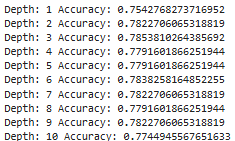

**Combined best parameters accuracy for DecisionTree:** 0.7853810264385692


**Random Forest Accuracy Score for n_estimators:**
- n_estimators 48 has the highest accuracy at 0.791601866




**Random Forest Accuracy Score for max_depth:**
- max_depth 6 has the highest accuracy at 0.8009331259720062

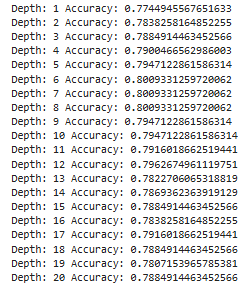

**Combined best parameters accuracy for RandomForest:** 0.7978227060653188

**Logistic Regression Accuracy Score With lbfgs:**
- Logistic Regression Model (Highest Accuracy Score - Training Set): **0.7131742738589212**
- Logistic Regression Model (Highest Accuracy Score - Validation Set): **0.7107309486780715**
- Gap: 0.2%
- lbfgs has the smallest gap showing more generalization and less overfitting than liblinear

**Logistic Regression Accuracy Score With Liblinear:**
- Logistic Regression Model (Highest Accuracy Score - Training Set): **0.7157676348547718**
- Logistic Regression Model (Highest Accuracy Score - Validation Set): **0.7091757387247278**
- Gap: 0.7%

**Logistic Regression Accuracy Score With Saga:**
- Logistic Regression Model (Highest Accuracy Score - Training Set): **0.7085062240663901**
- Logistic Regression Model (Highest Accuracy Score - Validation Set): **0.7076205287713841**
- Gap: 0.1%
- Best generalization (smallest gap), but took 5000 iterations rather than the default 100 for lbfgs and liblinear and had the lowest validation score

**Compare lbfgs with and w/o C parameter:**
- **No c parameter:** Logistic Regression Model (Highest Accuracy Score - Training Set): **0.7131742738589212**
- **No c parameter:** Logistic Regression Model (Highest Accuracy Score - Validation Set): **0.7107309486780715**
- **No c parameter:** Gap: 0.2%
- Best C: 0.01 - Validation Accuracy: **0.7558320373250389** - Gap: 0.27

**Best parameter setting for Logistic Regression:**
- (random_state=12345, solver='lbfgs',C=0.01,max_iter=1000)
- The c parameter suggests that the model was overfitting; so, setting the parameter lower makes the model simpler.

**Combined best parameters for Logistic Regression accuracy:** 0.7558320373250389


## Summary Notes of Findings:

**Decision Tree:**
- max_depth = 3 (Accuracy = 0.7853810264385692)
- **Best Parameter Setting:** (random_state=12345, max_depth = 3)
- **Combined best parameters accuracy for DecisionTree:** 0.7853810264385692

**Random Forest:**
- max_depth = 6 (Accuracy = 0.8009331259720062)
- n_estimators = 48 (Accuracy = 0.7916018662519441)
- **Best Parameter Setting:** (random_state=12345, max_depth = 6, n_estimators = 48)
- **Combined best parameters accuracy for RandomForest:** 0.7978227060653188

**Logistic Regression:**
- solver = lbfgs (Accuracy: 0.7107309486780715, Gap: 0.2%)
- c = 0.01 (Accuracy: 0.7558320373250389, Gap: 0.27%)
- **Best Parameter Setting:** (random_state=12345, solver='lbfgs',C=0.01,max_iter=1000)
- **Combined best parameters for accuracy Logistic Regression:** 0.7558320373250389

# Step 4: Check the Quality of Varying Models With Test Set

In [21]:
# Check the quality of the models using the test set

# Start with the DecisionTree

model = DecisionTreeClassifier(random_state=12345,max_depth=3)
model.fit(features_train,target_train)
accuracy_test = model.score(features_test,target_test) 

print("Accuracy of the test set for DecisionTreeClassifier:", accuracy_test)


Accuracy of the test set for DecisionTreeClassifier: 0.7791601866251944


In [22]:
# RandomForest Model

model = RandomForestClassifier(random_state=12345,max_depth=6,n_estimators=48)
model.fit(features_train,target_train)
accuracy_test = model.score(features_test,target_test)

print("Accuracy of the test set for RandomForestClassifier:", accuracy_test)

Accuracy of the test set for RandomForestClassifier: 0.7916018662519441


In [23]:

# LogisticRegression Model

model = LogisticRegression(random_state=12345,solver='lbfgs', C=0.01, max_iter=1000)
model.fit(features_train,target_train)
accuracy_test = model.score(features_test,target_test)

print("Accuracy of the test set for LogisticRegression:", accuracy_test)


Accuracy of the test set for LogisticRegression: 0.7387247278382582


**Comparison of Accuracy Scores Between Models:**

**DecisionTreeClassifier:** 0.7791601866251944

**RandomForestClassifier:** 0.7916018662519441

**LogisticRegression:** 0.7387247278382582

**Summary Statement:** Aligning with previous findings, the RandomForestClassifier model appears to be the best model for this dataset.

# Step 5: Check the Model for Errors

In [24]:
# Put the training and test data into a 80:20 ratio
features_full_train = pd.concat([features_train,features_valid])
target_full_train = pd.concat([target_train,target_valid])


In [25]:
# Train the new model

final_model = RandomForestClassifier(random_state=12345,max_depth=6,n_estimators=48)
final_model.fit(features_full_train,target_full_train)


RandomForestClassifier(max_depth=6, n_estimators=48, random_state=12345)

In [26]:
# Check for errors between the training set and the test set

train_accuracy = final_model.score(features_full_train, target_full_train)
test_accuracy = final_model.score(features_test,target_test)

print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print('Gap', (train_accuracy - test_accuracy))


Training Accuracy: 0.8284714119019837
Test Accuracy: 0.7978227060653188
Gap 0.030648705836664902


**Summary Notes:**
- 3.1% gap is Excellent; this tells us there is only a 3% drop from the model using known data to unknown data
- **Training Accuracy:** 0.8284714119019837
- **Testing Accuracy:** 0.7978227060653188

# General Conclusion

We can predict the right plan choice for customers with 79.8% accuracy using this Random Forest model. The small 3.1% gap between training and test performance demonstrates excellent generalization, meaning the model performs nearly as well on new, unseen customer data as it does on the data it learned from.

## MODEL PERFORMANCE COMPARISON (SUMMARY NOTES)

**Random Forest (SELECTED MODEL)**

<u>Hyperparameter Testing:</u>
- max_depth = 6 (Accuracy = 80.1%)
- n_estimators = 48 (Accuracy = 79.2%)

<u>Best Parameter Setting:</u>
- random_state=12345, max_depth=6, n_estimators=48

<u>Final Model Performance (80:20 split):</u>
- Training Accuracy: 82.8%
- Test Accuracy: 79.8%
- Gap: 3.1% (excellent generalization)

**Decision Tree:**

<u>Hyperparameter Testing:</u>
- max_depth = 3 (Accuracy = 78.5%)

<u>Best Parameter Setting:</u>
- random_state=12345, max_depth=3

<u>Final Model Performance:</u>
- Test Accuracy: 77.9%

**Logistic Regression:**

<u>Hyperparameter Testing:</u>
- solver = lbfgs (Accuracy: 71.1%, Gap: 0.2%)
- C = 0.01 (Accuracy: 75.6%, Gap: 0.27%)

<u>Best Parameter Setting:</u>
- random_state=12345, solver='lbfgs', C=0.01, max_iter=1000

<u>Final Model Performance:</u>
- Test Accuracy: 73.9%


## Final Recommendation

Random Forest achieved the highest test accuracy (79.8%) with excellent generalization, making it the optimal choice for predicting customer plan recommendations.